In [1]:
import matplotlib.pyplot as plt
import pylab as pyl
import nest
import numpy
neuron = nest.Create("iaf_psc_alpha",2)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [7]:
ndict = {"I_e": 200.0, "tau_m": 20.0}
neuronpop = nest.Create("iaf_psc_alpha", 3, params=ndict)

In [10]:
neuronpop.get()

{'archiver_length': (0, 0, 0),
 'beta_Ca': (0.001, 0.001, 0.001),
 'C_m': (250.0, 250.0, 250.0),
 'Ca': (0.0, 0.0, 0.0),
 'E_L': (-70.0, -70.0, -70.0),
 'element_type': ('neuron', 'neuron', 'neuron'),
 'frozen': (False, False, False),
 'global_id': (18, 19, 20),
 'I_e': (200.0, 200.0, 200.0),
 'local': (True, True, True),
 'model': ('iaf_psc_alpha', 'iaf_psc_alpha', 'iaf_psc_alpha'),
 'model_id': (17, 17, 17),
 'node_uses_wfr': (False, False, False),
 'post_trace': (0.0, 0.0, 0.0),
 'recordables': (('I_syn_ex', 'I_syn_in', 'V_m'),
  ('I_syn_ex', 'I_syn_in', 'V_m'),
  ('I_syn_ex', 'I_syn_in', 'V_m')),
 'synaptic_elements': ({}, {}, {}),
 't_ref': (2.0, 2.0, 2.0),
 't_spike': (-1.0, -1.0, -1.0),
 'tau_Ca': (10000.0, 10000.0, 10000.0),
 'tau_m': (20.0, 20.0, 20.0),
 'tau_minus': (20.0, 20.0, 20.0),
 'tau_minus_triplet': (110.0, 110.0, 110.0),
 'tau_syn_ex': (2.0, 2.0, 2.0),
 'tau_syn_in': (2.0, 2.0, 2.0),
 'thread': (0, 0, 0),
 'thread_local_id': (-1, -1, -1),
 'V_m': (-70.0, -70.0, -70.0

In [4]:
neuronpop.set({"I_e":[100,200,300]})

In [5]:
neuronpop.get("I_e")

(100.0, 200.0, 300.0)

In [10]:
multimeter = nest.Create("multimeter",3)
multimeter.set(record_from=["V_m"])

In [7]:
nest.Connect(multimeter,neuronpop)

In [8]:
nest.Simulate(100)


Mar 25 00:23:45 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Mar 25 00:23:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 25 00:23:45 SimulationManager::run [Info]: 
    Simulation finished.


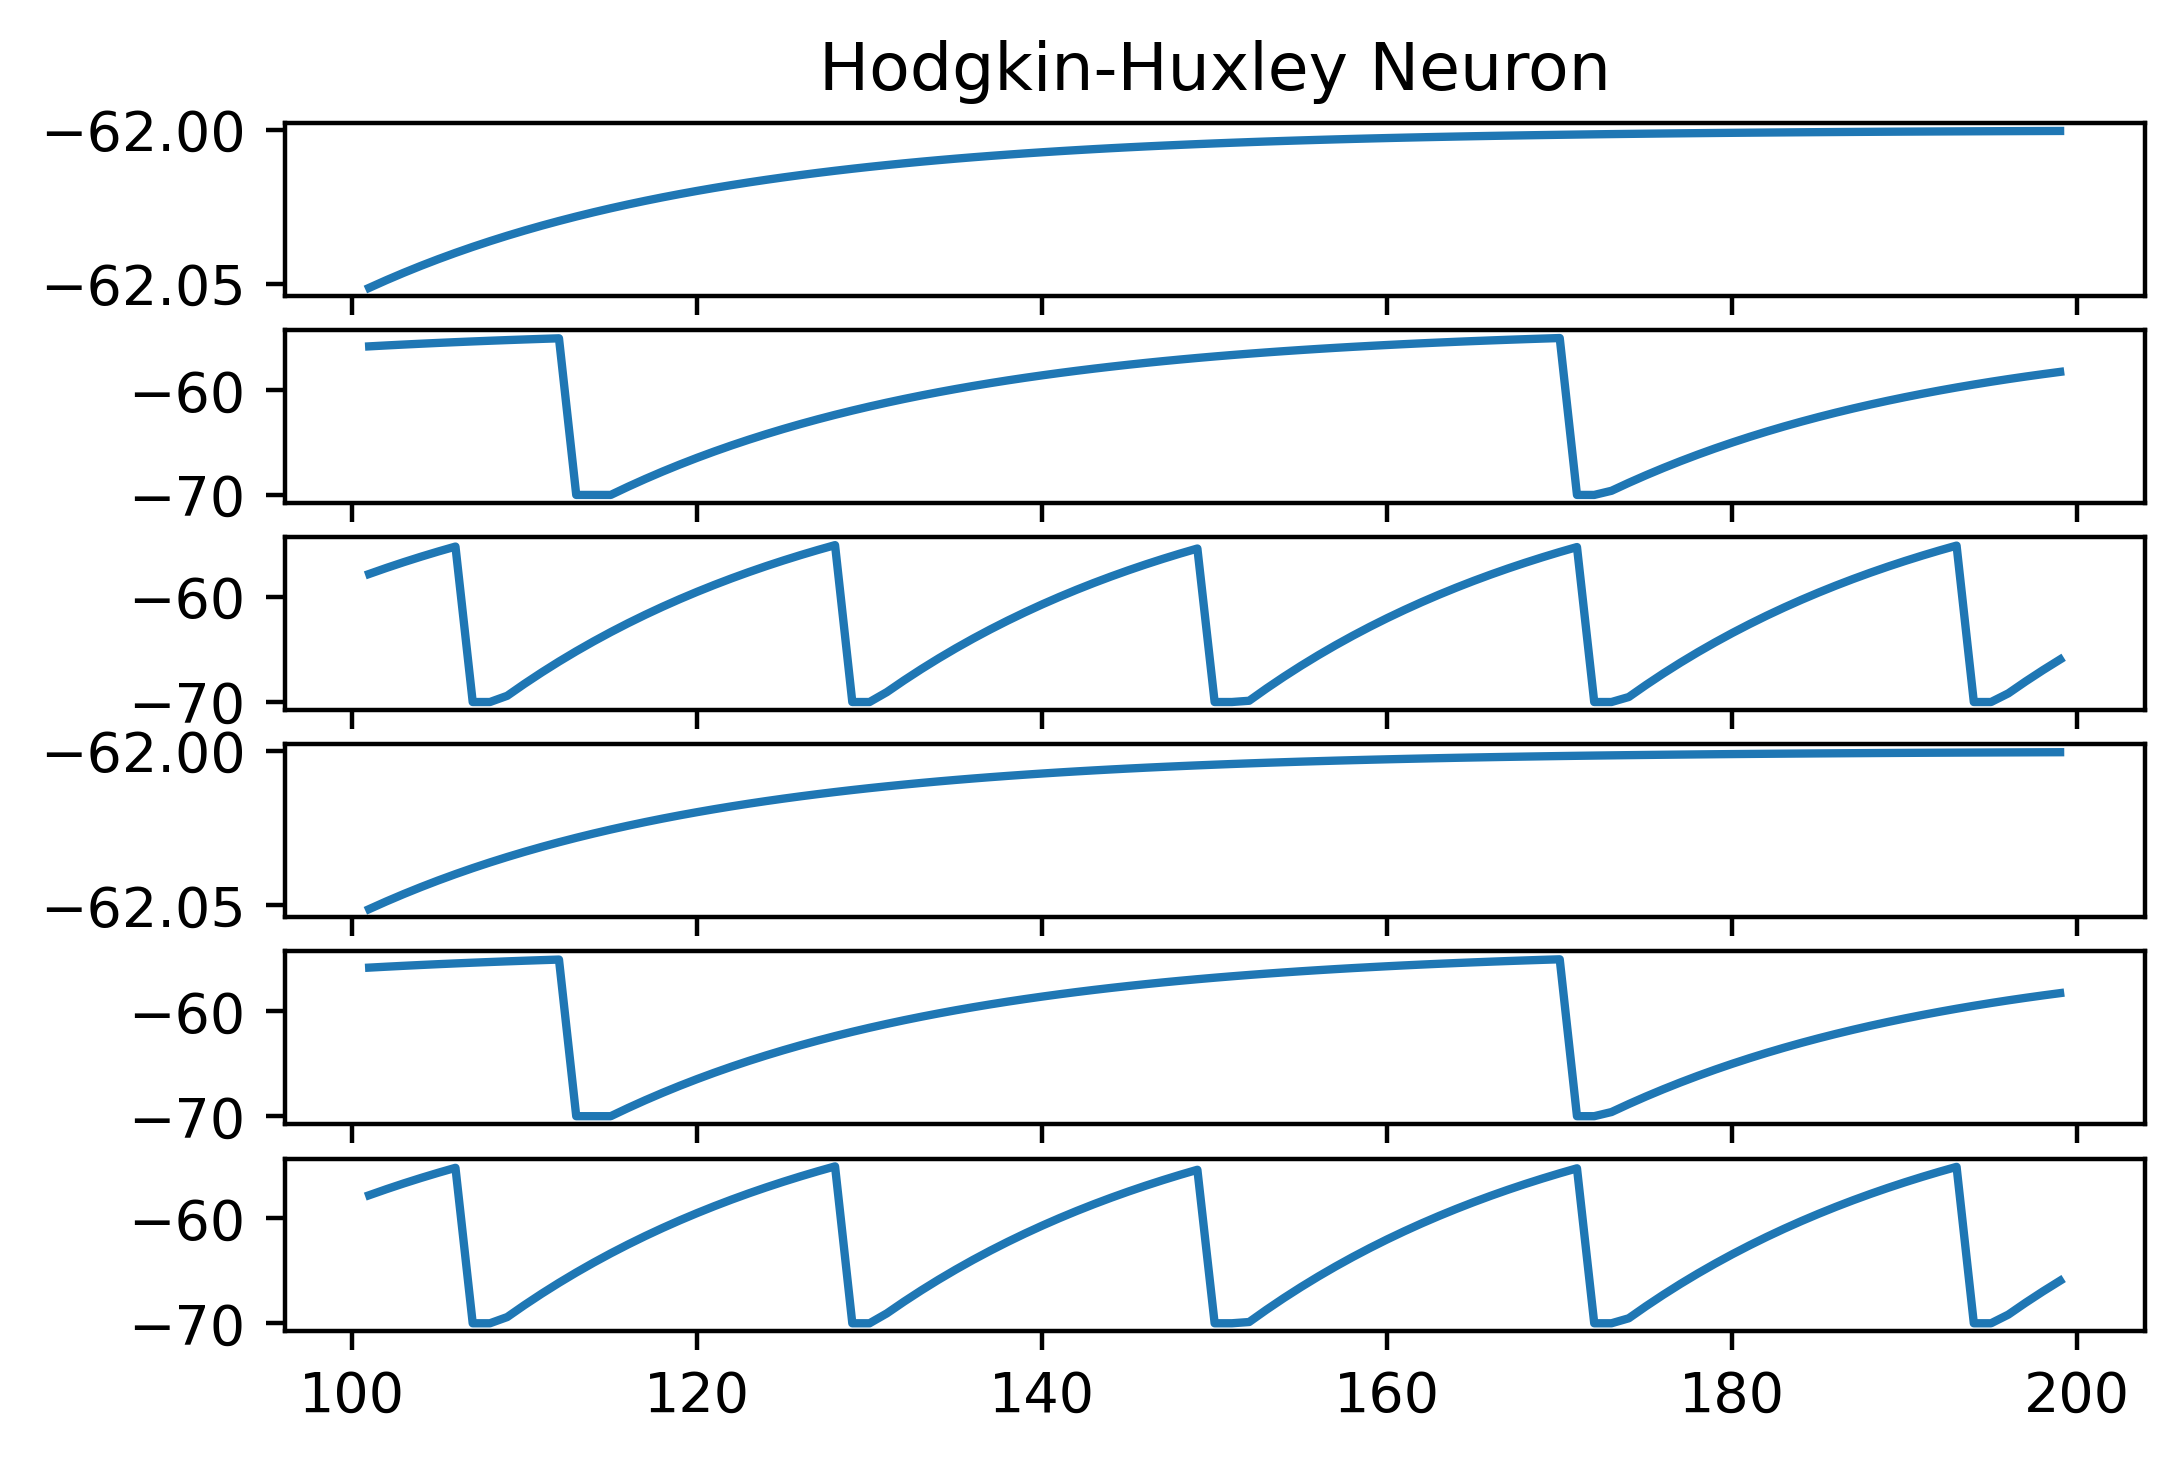

In [21]:
pyl.figure(dpi=400)

pyl.subplot(6,1,1)
pyl.title('Hodgkin-Huxley Neuron')
pyl.plot(multimeter.get("events")[0]["times"], multimeter.get("events")[0]["V_m"])
#pyl.ylabel('V (mV)')

pyl.subplot(6,1,2)
pyl.plot(multimeter.get("events")[1]["times"], multimeter.get("events")[1]["V_m"])
#pyl.ylabel('Current')
#pyl.legend()

pyl.subplot(6,1,3)
pyl.plot(multimeter.get("events")[2]["times"], multimeter.get("events")[2]["V_m"])
#pyl.ylabel('Gating Value')
#pyl.legend()

pyl.subplot(6,1,4)
pyl.plot(multimeter.get("events")[0]["times"], multimeter.get("events")[0]["V_m"])
#pyl.ylabel('V (mV)')

pyl.subplot(6,1,5)
pyl.plot(multimeter.get("events")[1]["times"], multimeter.get("events")[1]["V_m"])
#pyl.ylabel('Current')
#pyl.legend()

pyl.subplot(6,1,6)
pyl.plot(multimeter.get("events")[2]["times"], multimeter.get("events")[2]["V_m"])
#pyl.ylabel('Gating Value')
#pyl.legend()


pyl.show()

In [11]:
multimeter.get("events")[3]

IndexError: tuple index out of range


Mar 25 00:24:37 NodeManager::prepare_nodes [Info]: 
    Preparing 14 nodes for simulation.

Mar 25 00:24:37 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 14
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 25 00:24:37 SimulationManager::run [Info]: 
    Simulation finished.


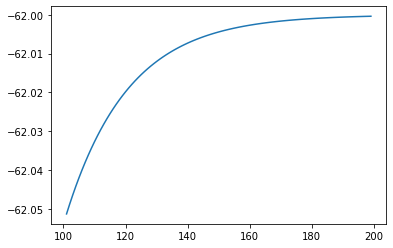

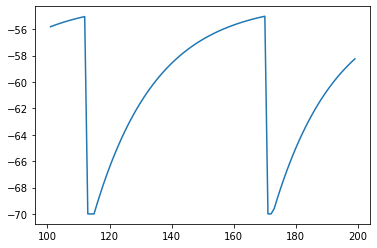

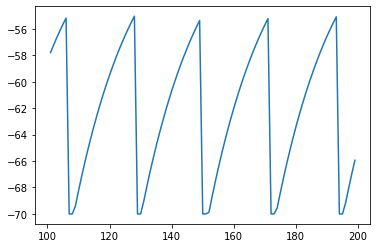

In [12]:
multimeter = nest.Create("multimeter",3)
multimeter.set(record_from=["V_m"])
nest.Connect(multimeter,neuronpop,conn_spec="one_to_one")
nest.Simulate(100)
plt.figure(1)
plt.plot(multimeter.get("events")[0]["times"], multimeter.get("events")[0]["V_m"])
plt.figure(2)
plt.plot(multimeter.get("events")[1]["times"], multimeter.get("events")[1]["V_m"])
plt.figure(3)
plt.plot(multimeter.get("events")[2]["times"], multimeter.get("events")[2]["V_m"])
plt.show()


In [ ]:
ndict = {"I_e": 200.0, "tau_m": 20.0}
nest.SetDefaults("iaf_psc_alpha", ndict)
neuronpop1 = nest.Create("iaf_psc_alpha", 100)
neuronpop2 = nest.Create("iaf_psc_alpha", 100)
neuronpop3 = nest.Create("iaf_psc_alpha", 100)

In [ ]:
edict = {"I_e": 200.0, "tau_m": 20.0}
nest.CopyModel("iaf_psc_alpha", "exc_iaf_psc_alpha")
nest.SetDefaults("exc_iaf_psc_alpha", edict)

In [ ]:
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict)

In [ ]:
epop1 = nest.Create("exc_iaf_psc_alpha", 100)
epop2 = nest.Create("exc_iaf_psc_alpha", 100)
ipop1 = nest.Create("inh_iaf_psc_alpha", 30)
ipop2 = nest.Create("inh_iaf_psc_alpha", 30)

In [ ]:
parameter_dict = {"I_e": [200.0, 150.0], "tau_m": 20.0, "V_m": [-77.0, -66.0]}
pop3 = nest.Create("iaf_psc_alpha", 2, params=parameter_dict)

print(pop3.get(["I_e", "tau_m", "V_m"]))

In [ ]:
Vth=-55.
Vrest=-70.
dVms =  {"V_m": [Vrest+(Vth-Vrest)*numpy.random.rand() for x in range(len(epop1))]}
epop1.set(dVms)

In [ ]:
epop1.set({"V_m": Vrest + nest.random.uniform(0.0, Vth-Vrest)})


In [ ]:
import nest
pop1 = nest.Create("iaf_psc_alpha", 10)
pop1.set({"I_e": 376.0})
pop2 = nest.Create("iaf_psc_alpha", 10)
multimeter = nest.Create("multimeter", 10)
multimeter.set({"record_from":["V_m"]})

In [ ]:
nest.Connect(pop1, pop2, syn_spec={"weight":20.0})

In [ ]:
nest.Connect(pop1, pop2, "one_to_one", syn_spec={"weight":20.0, "delay":1.0})

In [ ]:
nest.Connect(multimeter, pop2)

In [ ]:
nest.Models()